# Regression Modelling & Plotting
* Regress the China's HRC price on each factor to understand their relationships
* Use scatter plot to visualise the regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
dataset_path = "../data/final/wo_na.csv"
df = pd.read_csv(dataset_path)
df.head()

,Date,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM Spread ($/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
0,2006-09-01,472,59,116,252,261,14.277778,24.3,24.0,6.0,34.2,3.9
1,2006-10-01,477,62,85,260,292,13.657895,24.1,25.1,11.4,31.8,6.7
2,2006-11-01,470,62,84,262,288,16.078947,24.0,26.1,8.3,28.9,7.2
3,2006-12-01,470,61,90,270,282,15.512821,21.8,27.0,13.1,15.8,16.1
4,2007-01-01,470,62,98,273,273,13.026316,24.3,45.0,8.6,15.8,16.1


In [3]:
df.columns

Index(['Date', 'HRC (FOB, $/t)', 'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 'HRC - RM Spread ($/t)',
       'Monthly Export of Semis & Finished Steel as % of Production',
       'FAI in urban real estate development (y-o-y) Growth',
       'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
       'Air Conditioner (y-o-y)'],
      dtype='object')

In [4]:
y_col = "HRC (FOB, $/t)"

In [5]:
excluded_cols = ["Unnamed: 0", "Date", y_col]
x_columns = [col for col in df.columns if col not in excluded_cols]

In [6]:
df[x_columns]

,"Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM Spread ($/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
0,59,116,252,261,14.277778,24.3,24.0,6.0,34.2,3.9
1,62,85,260,292,13.657895,24.1,25.1,11.4,31.8,6.7
2,62,84,262,288,16.078947,24.0,26.1,8.3,28.9,7.2
3,61,90,270,282,15.512821,21.8,27.0,13.1,15.8,16.1
4,62,98,273,273,13.026316,24.3,45.0,8.6,15.8,16.1
...,...,...,...,...,...,...,...,...,...,...
213,107,249,378,98,9.510870,-10.1,5.7,1.3,9.7,13.8
214,106,237,376,92,9.433735,-10.2,4.5,1.4,7.3,9.5
215,99,206,346,100,12.179487,-10.2,3.4,1.1,7.3,7.8
216,94,187,337,116,13.181818,-10.1,2.7,1.1,7.5,8.0


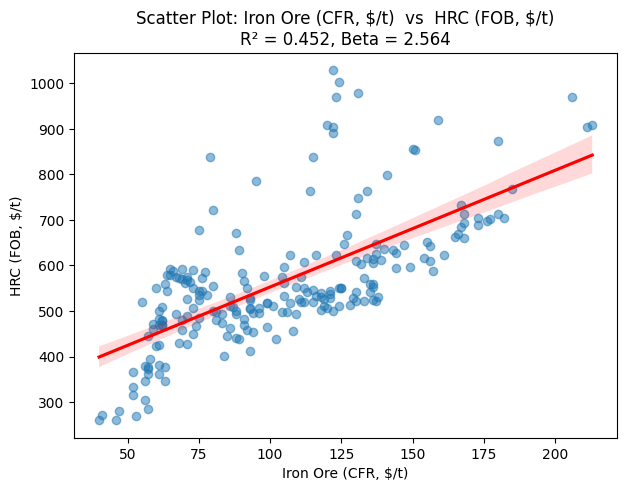

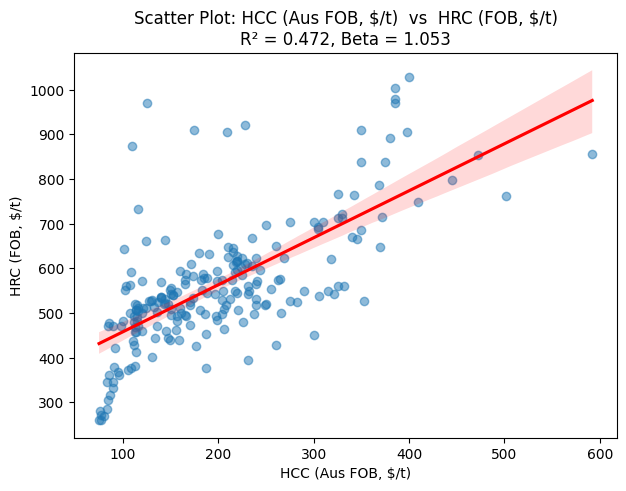

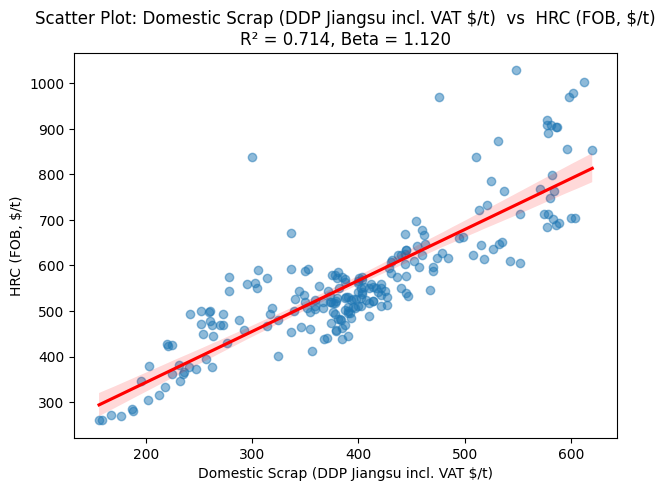

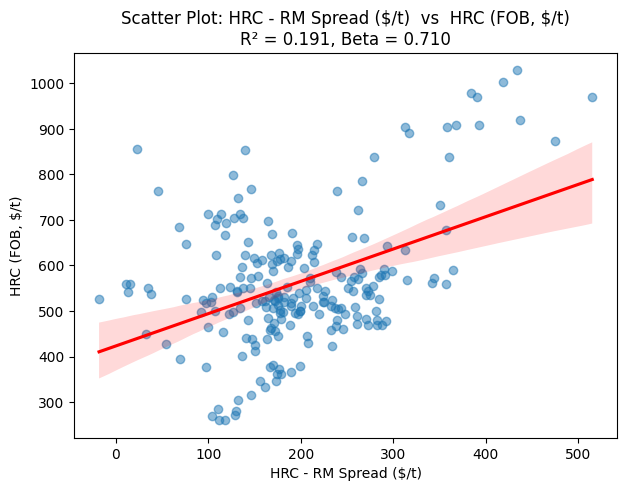

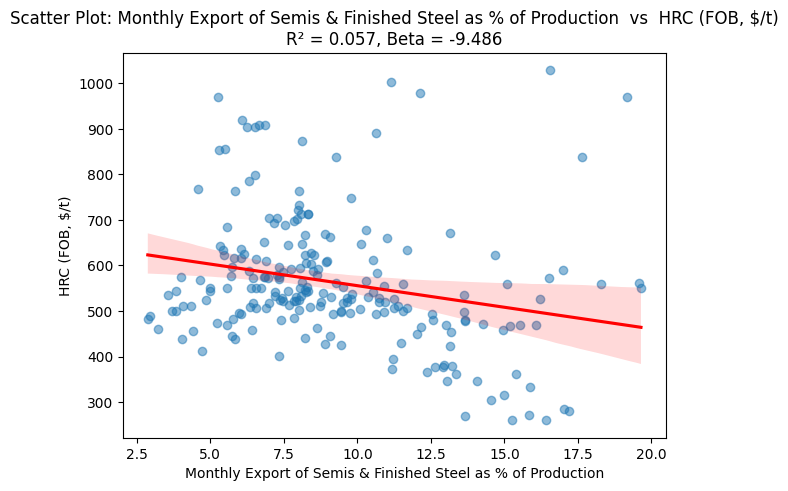

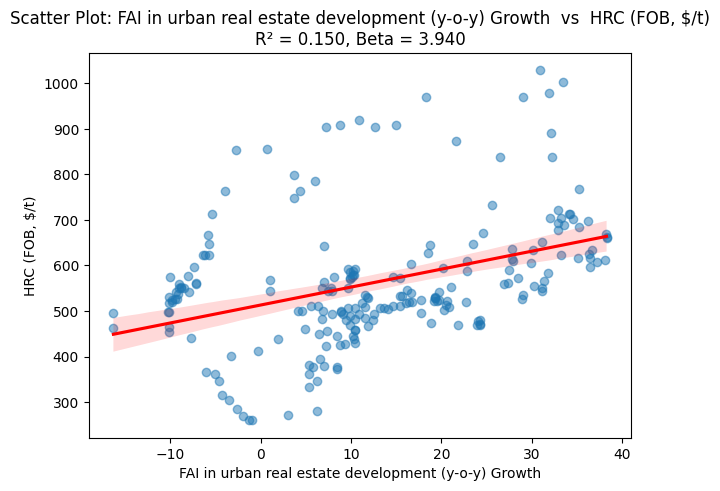

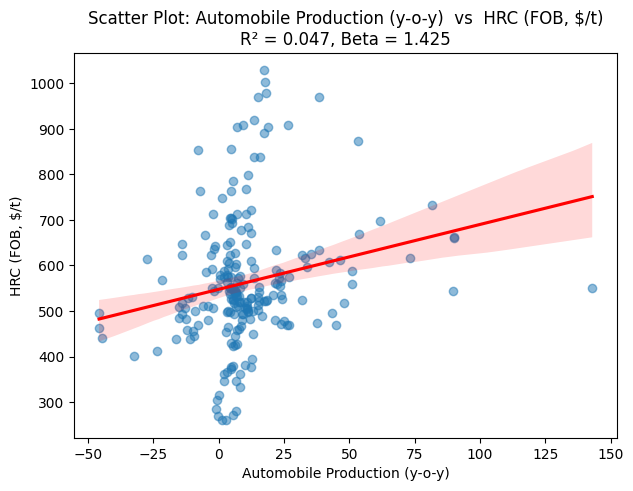

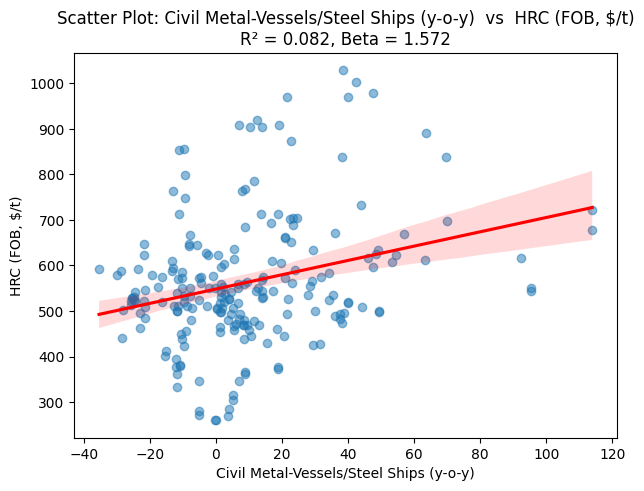

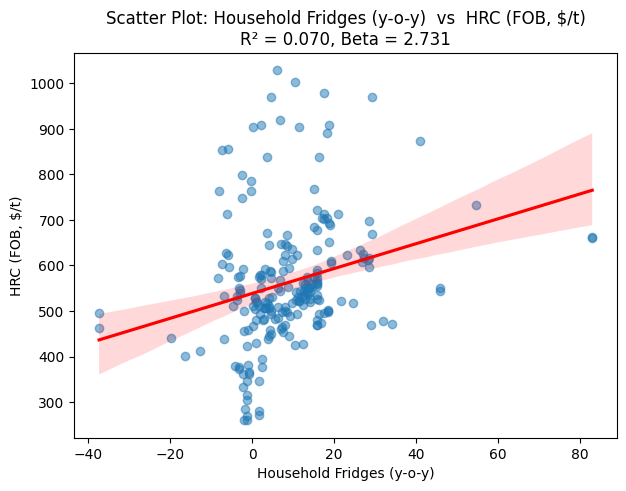

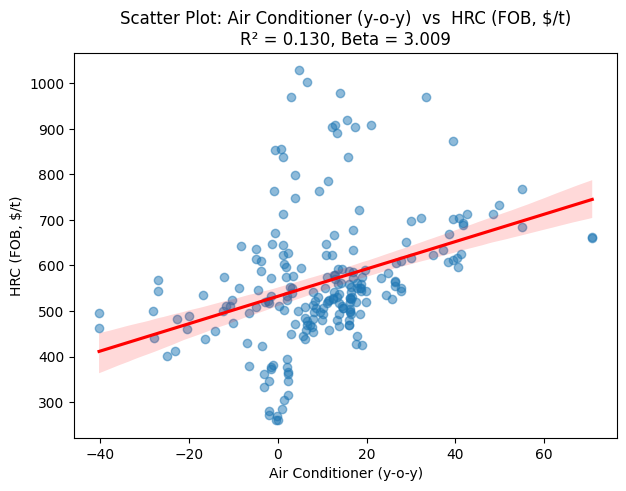

In [7]:
from scipy.stats import linregress

for x_col in x_columns:
    # Drop NaN values for the current variable
    temp_df = df[[x_col, y_col]].dropna()

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temp_df[x_col], temp_df[y_col])
    r_squared = r_value**2  # R² value

    # Create plot
    plt.figure(figsize=(7, 5))
    sns.regplot(x=temp_df[x_col], y=temp_df[y_col], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

    # Labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    x_col_name = x_col.replace("$", r"\$")
    y_col_name = y_col.replace("$", r"\$")
    plt.title(f"Scatter Plot: {x_col_name}  vs  {y_col_name}\nR² = {r_squared:.3f}, Beta = {slope:.3f}")

    # Show plot
    plt.show()

In [8]:
# remove outliers
spread_col = "HRC - RM Spread ($/t)"
fai_col = "FAI in urban real estate development (y-o-y) Growth"

# Ensure columns exist
for col in [y_col, spread_col, fai_col]:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found. Check column names!")

In [9]:
# Remove Outliers for 'HRC - RM Spread ($/t)' Using IQR**
Q1 = df[spread_col].quantile(0.25)
Q3 = df[spread_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[spread_col] >= lower_bound) & (df[spread_col] <= upper_bound)]

# Remove Outliers for 'FAI in urban real estate development (y-o-y) Growth' (within ±20% band)**
mean_fai = df[fai_col].mean()
lower_fai = mean_fai * 0.8  # 80% of mean
upper_fai = mean_fai * 1.2  # 120% of mean
df = df[(df[fai_col] >= lower_fai) & (df[fai_col] <= upper_fai)]

In [10]:
def plot_and_stats(x_col, y_col, df):
    temp_df = df[[x_col, y_col]].dropna()  # Drop NaN values

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temp_df[x_col], temp_df[y_col])
    r_squared = r_value**2  # R² value

    # Correlation
    correlation = temp_df[x_col].corr(temp_df[y_col])

    # Create plot
    plt.figure(figsize=(7, 5))
    sns.regplot(x=temp_df[x_col], y=temp_df[y_col], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

    # Labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Scatter Plot: {x_col} vs {y_col}\nR² = {r_squared:.3f}, Beta = {slope:.3f}, Corr = {correlation:.3f}")

    # Show plot
    plt.show()

    # Print stats
    print(f"Stats for {x_col} vs {y_col}:")
    print(f"  Correlation: {correlation:.3f}")
    print(f"  R²: {r_squared:.3f}")
    print(f"  Beta (Slope): {slope:.3f}")
    print("-" * 50)

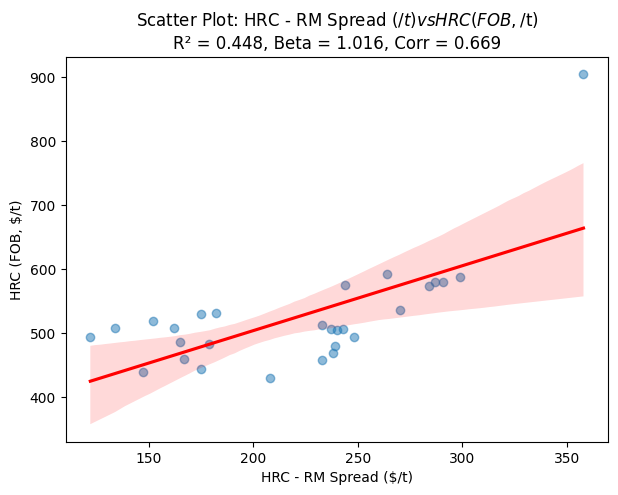

Stats for HRC - RM Spread ($/t) vs HRC (FOB, $/t):
  Correlation: 0.669
  R²: 0.448
  Beta (Slope): 1.016
--------------------------------------------------


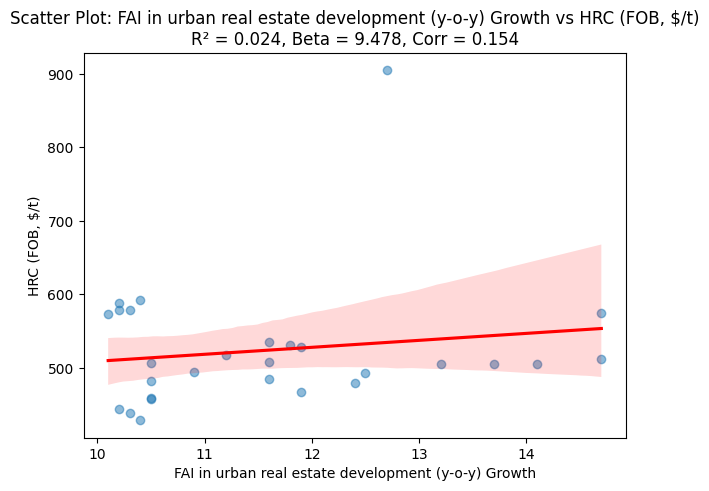

Stats for FAI in urban real estate development (y-o-y) Growth vs HRC (FOB, $/t):
  Correlation: 0.154
  R²: 0.024
  Beta (Slope): 9.478
--------------------------------------------------


In [11]:
# **Step 3: Generate Plots and Stats**
plot_and_stats(spread_col, y_col, df)  # Plot for Spread vs HRC
plot_and_stats(fai_col, y_col, df)     # Plot for FAI vs HRC

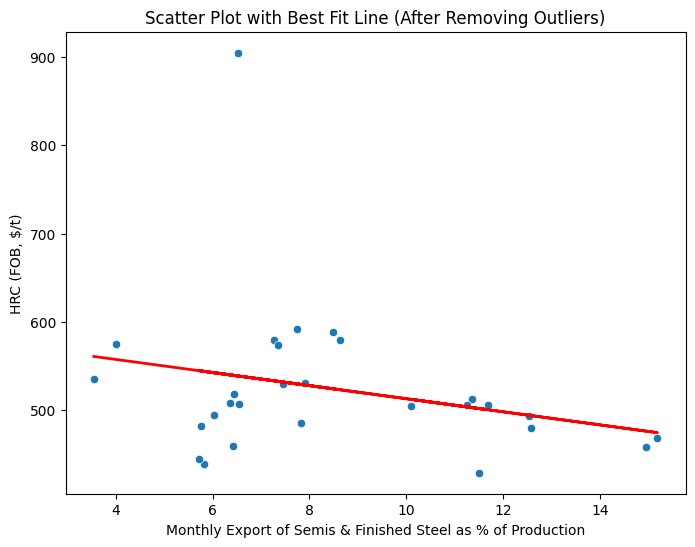

In [12]:
from sklearn.linear_model import LinearRegression

column_name = 'Monthly Export of Semis & Finished Steel as % of Production'

# Step 1: Calculate the IQR for the column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier bounds (1.5 * IQR below Q1 or above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove rows with values outside the bounds
df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# **Redo the Scatter Plot**
plt.figure(figsize=(8, 6))

# Scatter plot between 'Monthly Export of semis & finished steel as percentage of production' and 'HRC (FOB, $/t)'
sns.scatterplot(x=df_cleaned[column_name], y=df_cleaned['HRC (FOB, $/t)'])

# Fit a linear regression line (best fit)
reg = LinearRegression()
X = df_cleaned[column_name].values.reshape(-1, 1)
y = df_cleaned['HRC (FOB, $/t)']
reg.fit(X, y)
y_pred = reg.predict(X)

# Plot the regression line
plt.plot(df_cleaned[column_name], y_pred, color='red', linewidth=2)

# Add labels and title
plt.title(f"Scatter Plot with Best Fit Line (After Removing Outliers)")
plt.xlabel(f"{column_name}")
plt.ylabel('HRC (FOB, $/t)')

# Display the plot
plt.show()

## Collinearity Plot


🔹 **Highly Correlated Features (|r| ≥ 0.7):**
                                    Feature 1  \
0                         Iron Ore (CFR, $/t)   
1  Domestic Scrap (DDP Jiangsu incl. VAT $/t)   
2                       HRC - RM Spread ($/t)   
3               Automobile Production (y-o-y)   

                                    Feature 2  Correlation  
0  Domestic Scrap (DDP Jiangsu incl. VAT $/t)     0.770873  
1                         Iron Ore (CFR, $/t)     0.770873  
2               Automobile Production (y-o-y)     0.759244  
3                       HRC - RM Spread ($/t)     0.759244  


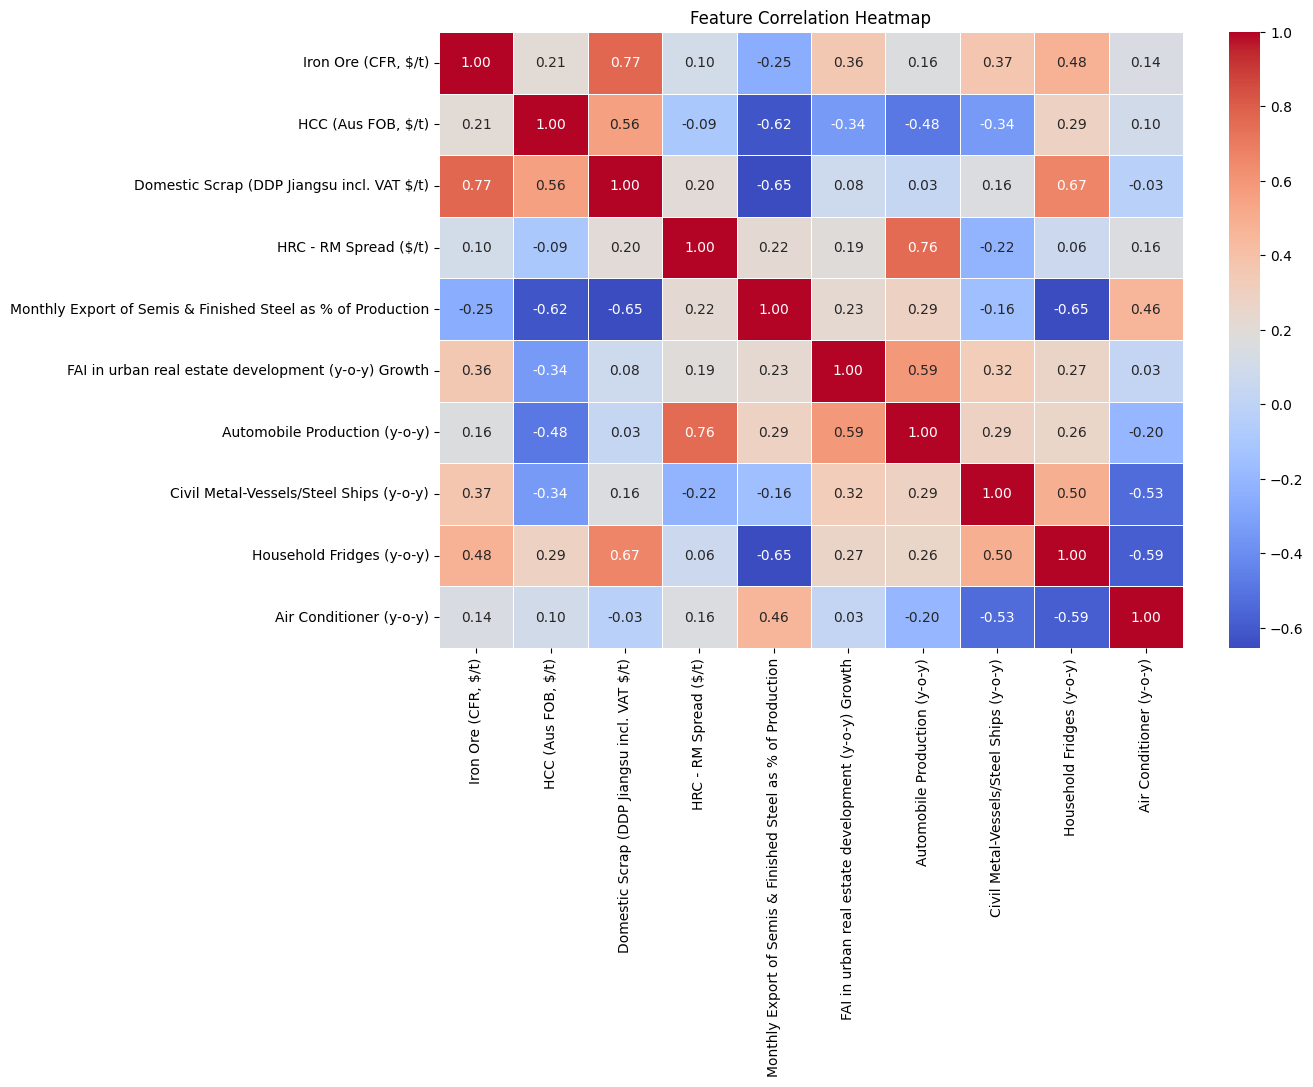

In [13]:
# Select independent variables (excluding 'HRC (FOB, $/t)' since it's the target)
X_cols = df.drop(columns=["HRC (FOB, $/t)"]).select_dtypes(include=[np.number])

# **Step 1: Compute Correlation Matrix**
corr_matrix = X_cols.corr()

# **Step 2: List Highly Correlated Features (Above ±0.7)**
threshold = 0.7
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns for col2 in corr_matrix.columns
    if col1 != col2 and abs(corr_matrix.loc[col1, col2]) >= threshold
]

# Convert to DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df = high_corr_df.drop_duplicates().sort_values(by="Correlation", ascending=False)

# Display highly correlated feature pairs
print("\n🔹 **Highly Correlated Features (|r| ≥ 0.7):**")
print(high_corr_df)

# **Step 3: Plot Correlation Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Step 3: Calculate Variance Inflation Factor (VIF)**
# **Step 4: Calculate Variance Inflation Factor (VIF)**
vif_data = pd.DataFrame()
vif_data["Feature"] = X_cols.columns
vif_data["VIF"] = [variance_inflation_factor(X_cols.values, i) for i in range(X_cols.shape[1])]

# Sort VIF values for easier interpretation
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\n🔹 **Variance Inflation Factor (VIF):**")
print(vif_data)


🔹 **Variance Inflation Factor (VIF):**
                                             Feature         VIF
2         Domestic Scrap (DDP Jiangsu incl. VAT $/t)  646.865578
3                              HRC - RM Spread ($/t)  257.785386
5  FAI in urban real estate development (y-o-y) G...  139.944318
0                                Iron Ore (CFR, $/t)   83.487902
1                                 HCC (Aus FOB, $/t)   71.196467
4  Monthly Export of Semis & Finished Steel as % ...   40.007190
6                      Automobile Production (y-o-y)   19.520238
8                          Household Fridges (y-o-y)   11.248476
9                            Air Conditioner (y-o-y)    8.903076
7            Civil Metal-Vessels/Steel Ships (y-o-y)    3.499719
